# Opening a new Pizze Place in San Francisco California

## 1. Introduction

### Introduction/Business Problem

Odd Moe's pizza is a local chain in NW Oregon region and in this scenario the business is looking to expand out of Oregon and into California, specifically San Francisco area. San Francisco already has a large amount of Pizza restaurants, but they are looking to compete and break into the market. Odd Moe's is confident that they can offer a new pizza experience but wants to run their new site in a safe environement and area of the City.

### Audience

The information discovered in the report will be of primary interest to the Odd Moe's head office, but it could also be of interest to any other pizza chains that are looking to expand into San Francisco in a safe environment.

## 2. Project Data

For the project, data will be sourced from the City of San Francisco website which offers datasets for neighborhoods and crime statistics. The Crime Statistics will be helpful in determining a safe environment for the new restuarant site. Along with the city data, Foursquare API will be utilized to explore venue data for San Francisco and determine an area of the city where a new Pizza place could do well.

# 3. Methodology

In this section we are going to solve the problem laid out in the above section and answer the research question. First step is to import necessary libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage, we use init
from sklearn.cluster import KMeans


print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                   /              failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.12|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|3.6.9|3.6.9|3.6.9|>=2.7,<2.8.0a0|3.6.9|>=3.5,<3.6.0a0|3.4.*',build='2_73_pypy|4_73_pypy|3_73_pypy|1_73_pypy|0_73_pypy']
  - geopy -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']
  - rsa -> python[versio

In [25]:
CLIENT_ID = 'FCJIKSJD1A2N5RD2NWFZJQ1K4TBXJMPOWZFNVIH2NEDQKER3' # your Foursquare ID
CLIENT_SECRET = '4TX5Q44HRCI55ZI3N5U0V4JMMRMCDYGIPLXXDWDQOVHIFBIQ' # your Foursquare Secret
LIMIT = 30
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FCJIKSJD1A2N5RD2NWFZJQ1K4TBXJMPOWZFNVIH2NEDQKER3
CLIENT_SECRET:4TX5Q44HRCI55ZI3N5U0V4JMMRMCDYGIPLXXDWDQOVHIFBIQ


Importing data for registered businesses in San Francisco

In [26]:
bus = pd.read_csv('https://data.sfgov.org/api/views/g8m3-pdis/rows.csv?accessType=DOWNLOAD')
print(bus.shape)
bus.head()

(265717, 31)


,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,Location Start Date,Location End Date,Mail Address,Mail City,Mail Zipcode,Mail State,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,1246992-02-201,1112166,The Silverman Govan Trust,Silverman Govan Trust - 41-43 Carl St.,101 Henry Adams St 315,San Francisco,CA,94103.0,08/12/2019,NaN,08/12/2019,NaN,101 Henry Adams St 315,San Francisco,94103,CA,5300-5399,Real Estate and Rental and Leasing Services,False,False,NaN,NaN,10.0,Mission Bay,NaN,POINT (-122.40383 37.7685),33.0,33.0,1.0,9.0,4.0
1,1236105-10-191,1107576,Jean-Charles Neel,John Neel,1800 Turk 203,San Francisco,CA,94115.0,10/14/2019,NaN,10/14/2019,NaN,1800 Turk St 203 Apt,San Francisco,94115,CA,7210-7219,Accommodations,False,True,NaN,NaN,5.0,Western Addition,NaN,POINT (-122.43886 37.77967),13.0,13.0,4.0,11.0,39.0
2,1248835-03-201,1112944,"Delta Computer Solutions, Inc.",Delta Construction Consulting,275 5th St Fl 4th,San+francisco,CA,94103.0,03/12/2020,NaN,03/12/2020,NaN,275 5th St 4th Fl,San Francisco,94103,CA,2300-2399,Construction,False,False,NaN,NaN,6.0,South of Market,NaN,POINT (-122.403595 37.78074),32.0,32.0,1.0,10.0,34.0
3,1227468-07-191,1104072,Kenneth Styles,Styles Law Firm,100 Pine St Ste 1250,San+francisco,CA,94011.0,07/01/2019,NaN,07/01/2019,NaN,100 Pine St 1250 Ste,San Francisco,94011,CA,5400-5499,"Professional, Scientific, and Technical Services",False,False,NaN,NaN,3.0,Financial District/South Beach,NaN,POINT (-122.39899 37.792614),108.0,108.0,6.0,3.0,8.0
4,1246385-02-201,1111909,Ascot Underwriting Incorporated,Ascot Underwriting Incorporated,55 46th St Fl 26,New+york,NY,10036.0,05/10/2019,NaN,05/10/2019,NaN,55 W 46th St 26 Fl,New York,10036,NY,5240-5249,Insurance,False,False,NaN,NaN,NaN,NaN,NaN,POINT (-73.9811 40.75701),NaN,NaN,NaN,NaN,NaN


In [27]:
# the columns we need
bus2 = bus[['Business Start Date','DBA Name', 'Neighborhoods - Analysis Boundaries']].copy()

# we remove rows with missing values
bus3 = bus2.dropna()

# format business start date to suit our need
bus3['Business Start Date'] = bus3['Business Start Date'].astype('datetime64[ns]') 

# we just look at areas that have seen the most businesses start in the last 15 years.
bus4 = bus3.loc[bus3['Business Start Date'] > '2005-01-01']

# we rename 'Neighborhoods - Analysis Boundaries' and 'DBA Name'
bus4.rename(columns={'Neighborhoods - Analysis Boundaries': 'Neighborhood'}, inplace = True)
bus4.rename(columns={'DBA Name': 'Businesses'}, inplace = True)

bus4.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Business Start Date,Businesses,Neighborhood
0,2019-08-12,Silverman Govan Trust - 41-43 Carl St.,Mission Bay
1,2019-10-14,John Neel,Western Addition
2,2020-03-12,Delta Construction Consulting,South of Market
3,2019-07-01,Styles Law Firm,Financial District/South Beach
5,2019-11-15,William Carey,Hayes Valley


We now find out how much each of the San Francisco neighborhood has been able to attract in the last 15 years

In [28]:
# aggregate of businesses in each neighborhood
bus5 = bus4.groupby('Neighborhood', as_index=False).count()
bus5.reset_index()
# we won't need business start date beyond here 
bus5.drop(columns = 'Business Start Date',inplace = True)
# order by number of businesses attracted and pick the top 10
bus6 = bus5.sort_values(by= ['Businesses'], ascending = False).head(10)
bus6.reset_index(drop=True)
bus6

,Neighborhood,Businesses
5,Financial District/South Beach,25039
18,Mission,12907
33,South of Market,10548
34,Sunset/Parkside,7839
0,Bayview Hunters Point,7348
16,Marina,5538
25,Outer Richmond,5383
35,Tenderloin,5232
3,Chinatown,5011
2,Castro/Upper Market,4924


In [29]:
# Here's the full list of neighborhoods and the businesses they have attracted
bus7 = bus5.sort_values(by= ['Businesses'], ascending = False)
bus7.reset_index(drop=True)
bus7

,Neighborhood,Businesses
5,Financial District/South Beach,25039
18,Mission,12907
33,South of Market,10548
34,Sunset/Parkside,7839
0,Bayview Hunters Point,7348
16,Marina,5538
25,Outer Richmond,5383
35,Tenderloin,5232
3,Chinatown,5011
2,Castro/Upper Market,4924


Plotting the information to see how neighborhoods have grown over the last 15 years

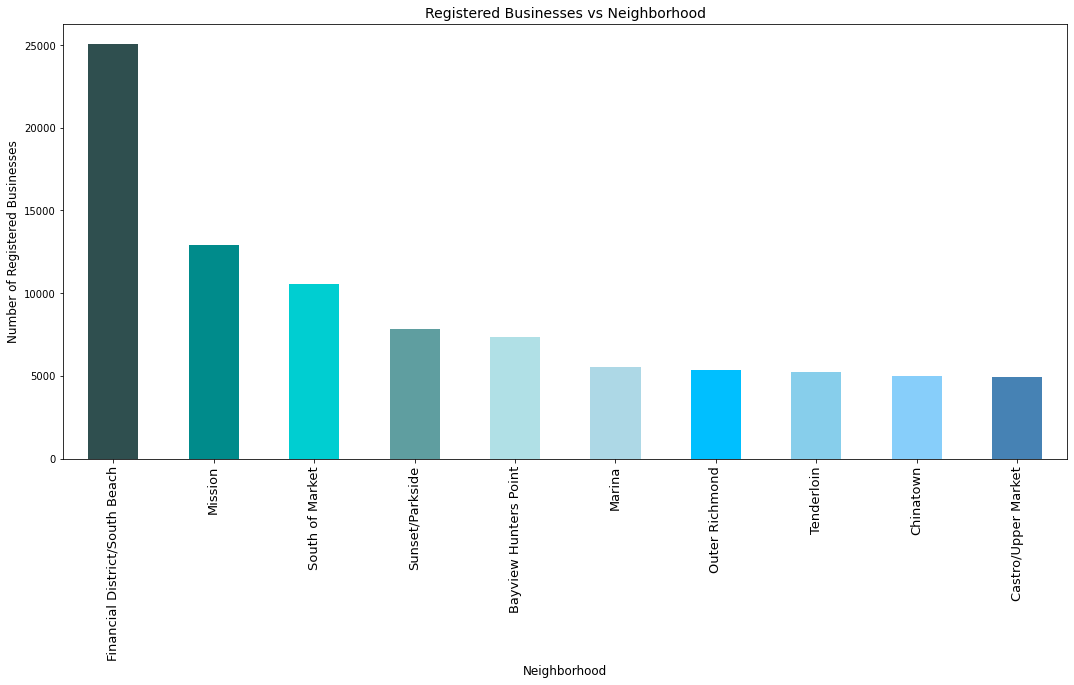

In [30]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# we plot the top 10 neighborhoods
bus6.plot.bar(x = 'Neighborhood', y = 'Businesses', title = "Registered Businesses vs Neighborhood", legend = None, rot= 90, figsize = (18, 8), color=['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Number of Registered Businesses', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Registered Businesses vs Neighborhood', fontsize = 14)
plt.show()

The Financial District has attracted more businesses but all the other neighborhoods in the top 10 especially the last 5 are pretty close to each other so we will continue our analysis with the 10 neighborhoods. As safe neighborhoods happen to be a huge factor for Odd Moe's Pizza, we next go for the Crime data in San Francisco.

In [31]:
crime = pd.read_csv('https://data.sfgov.org/api/views/wg3w-h783/rows.csv?accessType=DOWNLOAD')
print(crime.shape)
crime.head()

(417580, 36)


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2018/01/01 09:26:00 AM,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,171052174,173641140.0,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,03RD ST \ HOLLISTER AVE,20471000.0,Southern,Bayview Hunters Point,10.0,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)",88.0,2.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
1,2018/01/01 02:30:00 AM,2018/01/01,02:30,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,180000768,180010668.0,II,Initial,NaN,5041,Burglary,Burglary - Residential,"Burglary, Residence, Forcible Entry",Open or Active,LISBON ST \ PERSIA AVE,21719000.0,Ingleside,Excelsior,11.0,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)",90.0,9.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,2.0
2,2018/01/01 10:00:00 AM,2018/01/01,10:00,2018,Monday,2018/01/01 10:20:00 AM,61893275000,618932,180000605,180010893.0,IS,Initial Supplement,NaN,75000,Missing Person,Missing Person,Found Person,Open or Active,VAN NESS AVE \ WILLOW ST,25189000.0,Northern,Tenderloin,6.0,37.783370,-122.420832,"(37.78337048750076, -122.42083185184009)",20.0,4.0,10.0,36.0,NaN,NaN,1.0,NaN,NaN,2.0
3,2018/01/01 10:03:00 AM,2018/01/01,10:03,2018,Monday,2018/01/01 10:04:00 AM,61893565015,618935,180000887,180011579.0,II,Initial,NaN,65015,Other Miscellaneous,Other,"Driving, No License Issued",Cite or Arrest Adult,BRAZIL AVE \ MISSION ST,21769000.0,Ingleside,Outer Mission,11.0,37.724683,-122.434798,"(37.72468255342173, -122.43479841474401)",NaN,9.0,1.0,28.0,NaN,NaN,NaN,NaN,NaN,1.0
4,2018/01/01 09:01:00 AM,2018/01/01,09:01,2018,Monday,2018/01/01 09:39:00 AM,61893607041,618936,171052958,180011403.0,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,CUSTOM HOUSE PL \ JACKSON ST,24709000.0,Central,Chinatown,3.0,37.796698,-122.401294,"(37.796698028315056, -122.40129440446798)",106.0,6.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,2.0


In [32]:
# we limit the data to just the columns we need
crime1 = crime[['Analysis Neighborhood','Incident Category', 'Incident Date']]

# leave out rows with missing values
crime2 = crime1.dropna()

# format incident date to suit our needs
crime2['Incident Date'] = crime2['Incident Date'].astype('datetime64[ns]') 

# we'll limit the crimes data to the last 5 years so that we only look at relevant crimes in recent times
crime3 = crime2.loc[crime2['Incident Date'] > '2015-01-01']

# To guard against being distracted by non-criminal incidents, we'll leave them out
crime4 = crime3.loc[crime3['Incident Category'] != 'Non-Criminal']

#change the name of 'Analysis Neighborhood' to 'Neighborhood'
crime4.rename(columns={'Analysis Neighborhood': 'Neighborhood'}, inplace = True)

crime4.head(10)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Neighborhood,Incident Category,Incident Date
0,Bayview Hunters Point,Recovered Vehicle,2018-01-01
1,Excelsior,Burglary,2018-01-01
2,Tenderloin,Missing Person,2018-01-01
3,Outer Mission,Other Miscellaneous,2018-01-01
4,Chinatown,Recovered Vehicle,2018-01-01
5,Financial District/South Beach,Assault,2018-01-01
7,South of Market,Larceny Theft,2018-01-01
8,Oceanview/Merced/Ingleside,Assault,2018-01-01
9,Lakeshore,Burglary,2018-01-01
10,Financial District/South Beach,Suspicious Occ,2018-01-01


Similar to how we checked how much businesses each neighborhood attract, we want to see how well our neighborhoods attract crimes. For Odd Moe's we want to identify neighborhoods with good business activities and few crimes

In [33]:
# crimes in each neighborhood
crime5 = crime4.groupby('Neighborhood', as_index=False).count()
# we wont need Incident Date beyond here
crime5.drop(columns = 'Incident Date',inplace = True)
# rename Incident Category column to a more descriptive name
crime5.rename(columns={'Incident Category': 'Incidents'}, inplace = True)
#and sort our values
crime6 = crime5.sort_values(by= ['Incidents'], ascending = False)
crime7 = crime6.head(10)
crime7

,Neighborhood,Incidents
18,Mission,41616
35,Tenderloin,37689
5,Financial District/South Beach,32756
33,South of Market,31267
0,Bayview Hunters Point,22922
40,Western Addition,12222
2,Castro/Upper Market,11495
22,North Beach,11233
20,Nob Hill,10844
34,Sunset/Parkside,10767


In [34]:
# Here's the full list of neighborhoods and how much crime they have atttracted they have attracted
crime6

,Neighborhood,Incidents
18,Mission,41616
35,Tenderloin,37689
5,Financial District/South Beach,32756
33,South of Market,31267
0,Bayview Hunters Point,22922
40,Western Addition,12222
2,Castro/Upper Market,11495
22,North Beach,11233
20,Nob Hill,10844
34,Sunset/Parkside,10767


A quick look at the crime rates in the top 10 neighborhoods

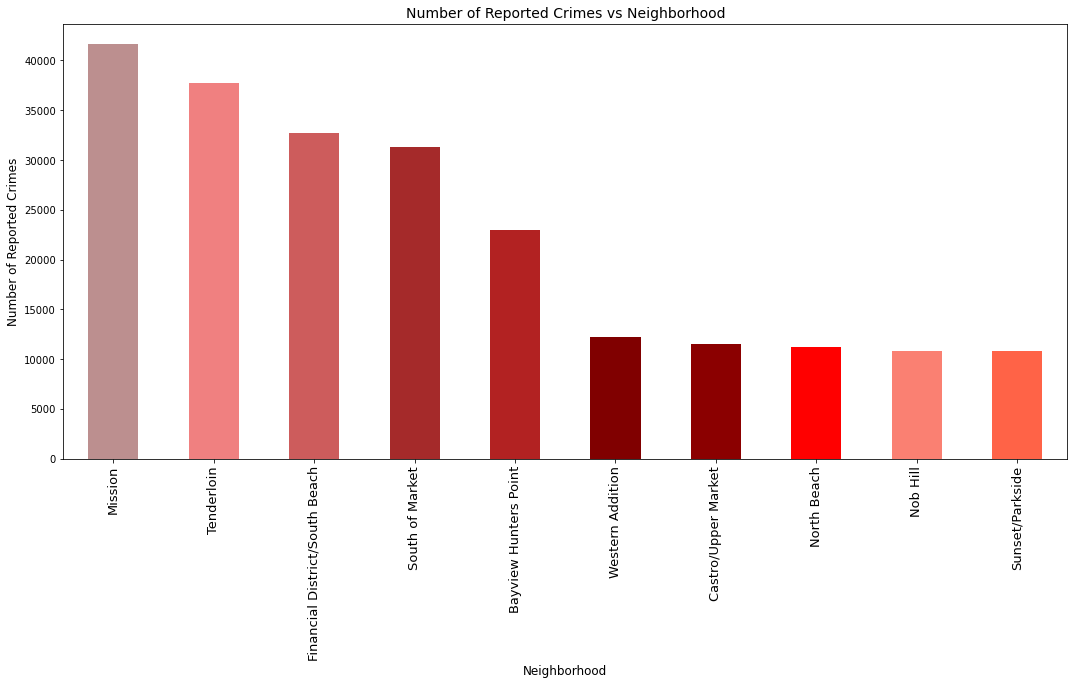

In [35]:
crime7.plot.bar(x = 'Neighborhood', y = 'Incidents', title = "Crime Incidents vs Neighborhood", legend = None, rot= 90, figsize = (18, 8), color=['rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'salmon', 'tomato'])
plt.ylabel('Number of Reported Crimes', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Number of Reported Crimes vs Neighborhood', fontsize = 14)
plt.show()

It appears there are 5 neighborhoods with huge crime rates and the rest having roughly the same crime rates. We can merge the top crime and businesses data to see how far apart crimes count differ from businesses count for each neighborhood

In [36]:
busCrime = pd.merge(bus7, crime6, on=['Neighborhood', 'Neighborhood'])
busCrime.head()

,Neighborhood,Businesses,Incidents
0,Financial District/South Beach,25039,32756
1,Mission,12907,41616
2,South of Market,10548,31267
3,Sunset/Parkside,7839,10767
4,Bayview Hunters Point,7348,22922


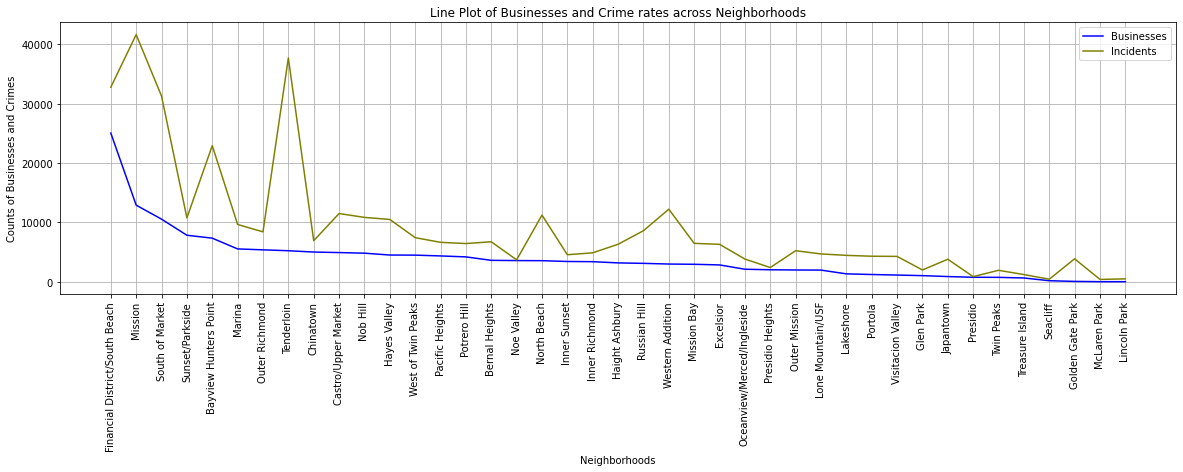

In [37]:
plt.figure(figsize=(20,5))
plt.plot( 'Neighborhood', 'Businesses', data=busCrime, marker='', color='blue')
plt.plot( 'Neighborhood', 'Incidents', data=busCrime, marker='', color='olive')
plt.xticks(rotation =90)
plt.xlabel("Neighborhoods")
plt.ylabel("Counts of Businesses and Crimes")
plt.title('Line Plot of Businesses and Crime rates across Neighborhoods')
plt.grid()
plt.legend()

From the multiple line plots above we can eyeball neighborhoods that has a good blend of decent business attraction and minimal crime rates. By far Mission neighborhood has the poorest combination of business and crime; the rate of business in Mission trails that of Financial district but crime rate in Mission clearly exceeds the rate in financial district. For example, among the top 5 neighborhoods in terms of businesses attraction, Sunset/Parkside shows a good blend. But we will investigate further before making any conclusions

From our top 10 neighborhoods in terms of business attraction, we want to take out the top 5 neighborhood in terms of crime rates. We would like to avoid these going forward.

In [38]:
# top 5 neighborhoods in terms of crime rate
crime8 = crime7.head(5)
crime8

,Neighborhood,Incidents
18,Mission,41616
35,Tenderloin,37689
5,Financial District/South Beach,32756
33,South of Market,31267
0,Bayview Hunters Point,22922


In [39]:
# nieghborhoods from the top 10 in terms of business attraction that happen to be among thos with top 5 neighborhoods in terms of crime rate
Overlap = bus6.merge(crime8, on=['Neighborhood'])
# neighborhoods from the top 10 in terms of business attraction that are not among neighborhoods with top 5 crime rates
SF_Neighborhoods = bus6[(~bus6.Neighborhood.isin(Overlap.Neighborhood))]
SF_Neighborhoods

,Neighborhood,Businesses
34,Sunset/Parkside,7839
16,Marina,5538
25,Outer Richmond,5383
3,Chinatown,5011
2,Castro/Upper Market,4924


This confirms what we found in the multiple line plot; Sunset/Parkside shows an excellent blend of business attraction and crime rate. Now we are going to get coordinates of each of our selected neighborhoods pulling the values from https://latlong.net which provides a free service for longitude and latitude of locations

In [40]:
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Sunset/Parkside' , 'Coordinates'] = "(37.749690, -122.494880)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Marina' , 'Coordinates'] = "(39.820580, -84.887010)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Outer Richmond' , 'Coordinates'] = "(37.803850, -122.450350)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Chinatown' , 'Coordinates'] = "(37.765730, -122.435470)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Castro/Upper Market' , 'Coordinates'] = "(37.758430, -122.448440)"
SF_Neighborhoods

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Neighborhood,Businesses,Coordinates
34,Sunset/Parkside,7839,"(37.749690, -122.494880)"
16,Marina,5538,"(39.820580, -84.887010)"
25,Outer Richmond,5383,"(37.803850, -122.450350)"
3,Chinatown,5011,"(37.765730, -122.435470)"
2,Castro/Upper Market,4924,"(37.758430, -122.448440)"


We now merge our business, crime and coordinates data

In [41]:
SF = SF_Neighborhoods.merge(crime6, on=['Neighborhood'])
SF.rename(columns={'Incidents':'Crimes'}, inplace = True)
SF = SF[['Neighborhood', 'Businesses', 'Crimes','Coordinates']]
SF['Coordinates'].to_string()
SF[['Latitude','Longitude']] = SF['Coordinates'].str.strip('(').str.strip(')').str.split(', ', expand=True)

SF

,Neighborhood,Businesses,Crimes,Coordinates,Latitude,Longitude
0,Sunset/Parkside,7839,10767,"(37.749690, -122.494880)",37.749690,-122.494880
1,Marina,5538,9657,"(39.820580, -84.887010)",39.820580,-84.887010
2,Outer Richmond,5383,8410,"(37.803850, -122.450350)",37.803850,-122.450350
3,Chinatown,5011,6925,"(37.765730, -122.435470)",37.765730,-122.435470
4,Castro/Upper Market,4924,11495,"(37.758430, -122.448440)",37.758430,-122.448440


We now turn to Foursquare API. We use a function to search most popular venues within 1 mile radius of our neighborhoods

In [44]:
def getSurroundingVenues(names, latitudes, longitudes, radius=1609.34):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
    
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    surrounding_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    surrounding_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(surrounding_venues)

In [45]:
# Here we invoke the getSurroundingVenues() function to get surrounding venues
SF_venues = getSurroundingVenues(names=SF['Neighborhood'],
                                   latitudes=SF['Latitude'],
                                   longitudes=SF['Longitude']
                                  )

Sunset/Parkside
Marina
Outer Richmond
Chinatown
Castro/Upper Market


In [46]:
# sanity check to be sure we have 30 venues for each neighborhood
print(SF_venues.shape)
SF_venues.head()

(150, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sunset/Parkside,37.749690,-122.494880,West Sunset Playground,37.750659,-122.497928,Playground
1,Sunset/Parkside,37.749690,-122.494880,Polly Ann Ice Cream,37.753454,-122.497765,Ice Cream Shop
2,Sunset/Parkside,37.749690,-122.494880,Devil's Teeth Baking Company,37.753045,-122.505025,Bakery
3,Sunset/Parkside,37.749690,-122.494880,"Andytown Roastery, Training Lab & Coffee Supply",37.742142,-122.498566,Coffee Shop
4,Sunset/Parkside,37.749690,-122.494880,Toyose,37.753077,-122.504693,Korean Restaurant


In [47]:
SF_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Castro/Upper Market,30,30,30,30,30,30
Chinatown,30,30,30,30,30,30
Marina,30,30,30,30,30,30
Outer Richmond,30,30,30,30,30,30
Sunset/Parkside,30,30,30,30,30,30


In [48]:
# the number of unique types of venues pulled
print('There are {} uniques categories.'.format(len(SF_venues['Venue Category'].unique())))

There are 85 uniques categories.


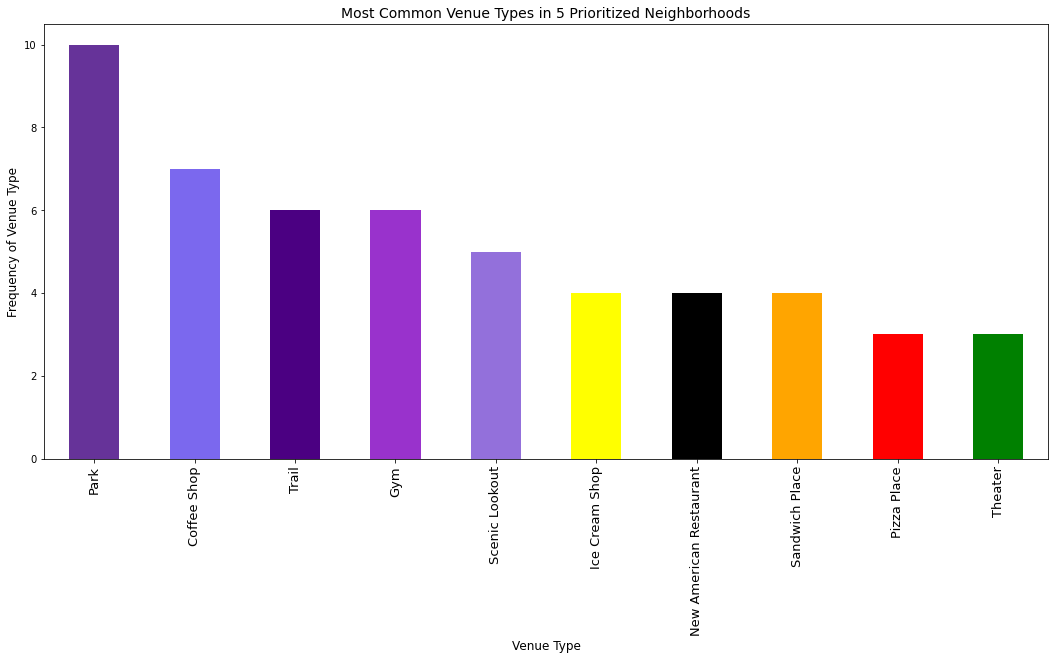

In [49]:
SF_top_venues = SF_venues.groupby('Venue Category', as_index = False).count().sort_values('Neighborhood', ascending = False).head(10)
SF_top_venues = SF_top_venues[['Venue Category','Neighborhood']]
SF_top_venues.rename(columns={'Neighborhood': 'Frequency'}, inplace = True)
SF_top_venues.plot.bar(x='Venue Category', y='Frequency', legend = None, title = "Most common venue types in 5 prioritized neighborhoods", rot= 90, figsize = (18, 8), color=['rebeccapurple','mediumslateblue','indigo','darkorchid','mediumpurple','yellow','black','orange','red','green'])
plt.ylabel('Frequency of Venue Type', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Venue Type', fontsize=12)
plt.title('Most Common Venue Types in 5 Prioritized Neighborhoods', fontsize = 14)
plt.show()

By far Parks and Coffee shops are the most common venue type around the 5 neighborhoods. Trail, Gyms and scenic look outs follow and lastly we have Sandwhich places, Pizza places and Theaters. We can further analyze this:

In [50]:
# one hot encoding
SF_onehot = pd.get_dummies(SF_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SF_onehot['Neighborhood'] = SF_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SF_onehot.columns[-1]] + list(SF_onehot.columns[:-1])
SF_onehot = SF_onehot[fixed_columns]

SF_onehot.head()

,Neighborhood,ATM,American Restaurant,BBQ Joint,Bagel Shop,Bakery,Beach,Beer Bar,Bistro,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,Café,Camera Store,Candy Store,Cheese Shop,Chinese Restaurant,Cocktail Bar,Coffee Shop,Concert Hall,Cosmetics Shop,Deli / Bodega,Dim Sum Restaurant,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Empanada Restaurant,Escape Room,Event Space,Fast Food Restaurant,Field,Food,Fountain,French Restaurant,Gas Station,Gay Bar,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,History Museum,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Mountain,Movie Theater,Museum,New American Restaurant,Office,Organic Grocery,Outdoor Sculpture,Park,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Pool,Pub,Record Shop,Restaurant,Rock Club,Sandwich Place,Scenic Lookout,Spa,Sporting Goods Shop,Street Food Gathering,Szechuan Restaurant,Theater,Tourist Information Center,Trail,Video Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Sunset/Parkside,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# we now aggregate the data
SF_grouped = SF_onehot.groupby('Neighborhood').mean().reset_index()
SF_grouped

,Neighborhood,ATM,American Restaurant,BBQ Joint,Bagel Shop,Bakery,Beach,Beer Bar,Bistro,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,Café,Camera Store,Candy Store,Cheese Shop,Chinese Restaurant,Cocktail Bar,Coffee Shop,Concert Hall,Cosmetics Shop,Deli / Bodega,Dim Sum Restaurant,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Empanada Restaurant,Escape Room,Event Space,Fast Food Restaurant,Field,Food,Fountain,French Restaurant,Gas Station,Gay Bar,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,History Museum,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Mountain,Movie Theater,Museum,New American Restaurant,Office,Organic Grocery,Outdoor Sculpture,Park,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Pool,Pub,Record Shop,Restaurant,Rock Club,Sandwich Place,Scenic Lookout,Spa,Sporting Goods Shop,Street Food Gathering,Szechuan Restaurant,Theater,Tourist Information Center,Trail,Video Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Castro/Upper Market,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.066667,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.133333,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.100000,0.000000,0.000000,0.066667,0.000000
1,Chinatown,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.033333
2,Marina,0.033333,0.066667,0.033333,0.066667,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000
3,Outer Richmond,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.100000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [52]:
# return for each neighborhood the top 10 most common venues
num_top_venues = 20

for hood in SF_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = SF_grouped[SF_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Castro/Upper Market----
                        venue  freq
0                        Park  0.13
1                       Trail  0.10
2              Scenic Lookout  0.10
3         Monument / Landmark  0.07
4                    Wine Bar  0.07
5              Breakfast Spot  0.07
6                 Cheese Shop  0.03
7       Performing Arts Venue  0.03
8             Organic Grocery  0.03
9                     Dog Run  0.03
10                 Playground  0.03
11             Ice Cream Shop  0.03
12                Coffee Shop  0.03
13                   Mountain  0.03
14                       Hill  0.03
15  Middle Eastern Restaurant  0.03
16                       Café  0.03
17         Mexican Restaurant  0.03
18        Szechuan Restaurant  0.03
19             Hardware Store  0.03


----Chinatown----
                      venue  freq
0   New American Restaurant  0.10
1                      Park  0.10
2               Yoga Studio  0.03
3         French Restaurant  0.03
4            Scenic Lookou

Looking at the result of the Top 20 venues in each of the 5 neighborhoods, only Marina and Sunset/Parkside have Pizza Place in the list. This shows that there is a thriving market for Pizzas in these 2 neighborhoods. Since Odd Moe's is ready to compete, these 2 neighborhoods should be the right neighborhoods. With Pizza places being among the most popular venue types in Marina, we'd expect this neighborhood to have a good population of Pizza lovers who are going to appreciate what Odd Moe's has to offer. Lastly, we can cluster our neighborhoods using k-means to see if clustering algorithm agrees with the intuition from our analysis. We will set init to kmeans++ to guard against the effect of randomization on inital centroid placement of centroids.

In [53]:
# set number of clusters to see what neighborhoods get into the same cluster
kclusters = 2

SF_grouped_clustering = SF_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0, init='k-means++').fit(SF_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5]

array([1, 1, 0, 1, 0], dtype=int32)

In [54]:
SF_grouped.insert(1, 'Cluster Labels', kmeans.labels_)
SF_grouped

,Neighborhood,Cluster Labels,ATM,American Restaurant,BBQ Joint,Bagel Shop,Bakery,Beach,Beer Bar,Bistro,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,Café,Camera Store,Candy Store,Cheese Shop,Chinese Restaurant,Cocktail Bar,Coffee Shop,Concert Hall,Cosmetics Shop,Deli / Bodega,Dim Sum Restaurant,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Empanada Restaurant,Escape Room,Event Space,Fast Food Restaurant,Field,Food,Fountain,French Restaurant,Gas Station,Gay Bar,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,History Museum,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Mountain,Movie Theater,Museum,New American Restaurant,Office,Organic Grocery,Outdoor Sculpture,Park,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Pool,Pub,Record Shop,Restaurant,Rock Club,Sandwich Place,Scenic Lookout,Spa,Sporting Goods Shop,Street Food Gathering,Szechuan Restaurant,Theater,Tourist Information Center,Trail,Video Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Castro/Upper Market,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.066667,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.133333,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.100000,0.000000,0.000000,0.066667,0.000000
1,Chinatown,1,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.033333
2,Marina,0,0.033333,0.066667,0.033333,0.066667,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000
3,Outer Richmond,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.100000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.00000

Again we see from the Cluster Labels column that Marina and Sunset/Parkside are grouped into the same cluster by k-means

# 4. Results and Discussion

In this task we have pulled data on crime rate and business attraction for neighborhoods in San Francisco and used the information to answer the question of where to site a new Pizza Place in San Francisco that can provide a good combination of patronage and low crime rates. We identified 10 best neighborhood in terms of how well they have attracted businesses and from these we took out 5 neighborhoods that even though attract businesses but also have very high crime rates. Our analysis showed that:

- Financial District and Mission neighborhoods attract huge amount of businesses but also attracts the highest crime rates in San Francisco
- Coffee shops, Parks, Ice cream shops, Trails, Gyms, Scenic Lookout, Pizza Places, Sandwhich Places, and American Restaurants are the most common venues in the 5 preferred   neighborhoods
- Clustering neighborhoods based on their most popular venues grouped into 2 clusters resulted in Marina and Sunset/Parkside falling into the same cluster while Castro/ Upper Market, Chinatown, and Outer Richmond in another cluster.
- It turned out one of the most common venues in Marina are Pizza Places. Sunset/Parkside also has a bit of presence of Pizza places. Pizza places do not appear to be common in Other Neighborhoods.

Our analysis shows that Pizza Places is not very common in our prefered neighborhoods (those with good business inflow and relatively low crime rates) except for Marina and Sunset/Parkside. This shows that there is a thriving market for Pizzas in these 2 neighborhoods. Since Odd Moe's is ready to compete, these 2 neighborhoods should be the right neighborhoods. With Pizza Places being one of the most popular venue in Marina, we'd expect this neighborhood to have a good population of Pizza lovers who are going to appreciate what Odd Moe's has to offer.

# 5. Conclusion

In this data science capstone project, we have used common python libraries to manipulate data sets and Foursquare API to explore the neighborhoods of San Francisco. We used K-means clustering algorithm to verify the intuition we found through analysis which supported our observation. In the future we would attempt a time series analysis of businesses and crimes in neighborhoods so we can observe the trend and guard against basing our judgement on trends overall history which could have changed.